# Histogram of Oriented Gradients 

I came across a simple HoG implementation while taking CS231n. I knew a little about how HoG works by reading the paper [1], but, as has always been the case, I needed some visualization to keep it in my memory for longer, so I wrote this notebook to help myself. Try to play with it, hope you find it useful. 

In [262]:
from scipy.misc import imread, imresize
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
def rgb2gray(rgb):
  """Convert RGB image to grayscale

    Parameters:
      rgb : RGB image

    Returns:
      gray : grayscale image
  
  """
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [20]:
image=imread('golden_gate_bridge.jpg')

## 1. Let's display the original image

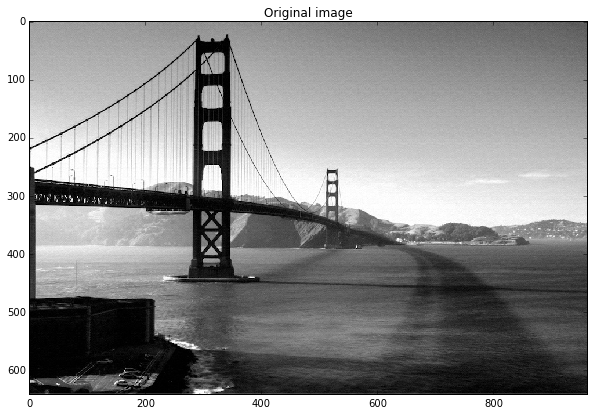

In [263]:

plt.gcf().set_size_inches(10, 8)
plt.title('Original image')
plt.imshow(image)

## 2. Convert to grayscale

In [264]:
image_gray = rgb2gray(image)

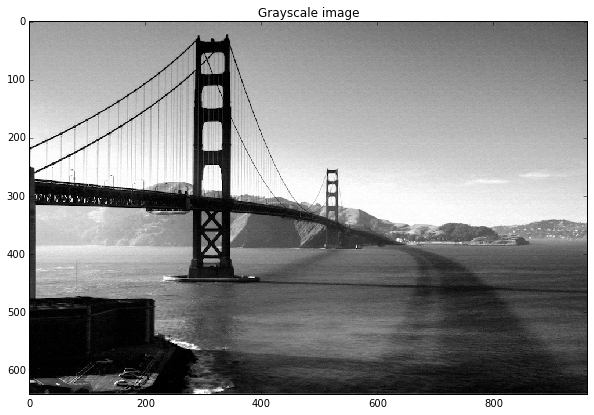

In [265]:
plt.gcf().set_size_inches(10, 8)
plt.title('Grayscale image')
plt.imshow(image_gray, cmap="gray")

## 3. Gradients along x and y direction 

In [272]:
gx = np.zeros(image_gray.shape)
gy = np.zeros(image_gray.shape)
gx[:, :-1] = np.diff(image_gray, n=1, axis=1) # compute gradient on x-direction
gy[:-1, :] = np.diff(image_gray, n=1, axis=0) # compute gradient on y-direction

In [273]:
print "gradient x min=%f, max=%f"%(gx.min(), gx.max())
print "gradient y min=%f, max=%f"%(gy.min(), gy.max())

gradient x min=-232.780000, max=225.570000
gradient y min=-221.450000, max=224.540000


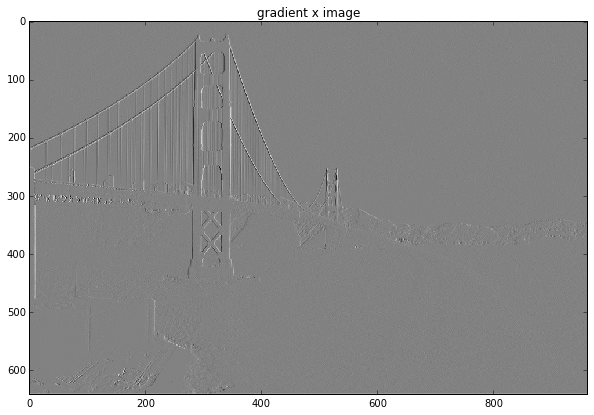

In [274]:
plt.gcf().set_size_inches(10, 8)
plt.title('gradient x image')
plt.imshow(gx, cmap="gray")

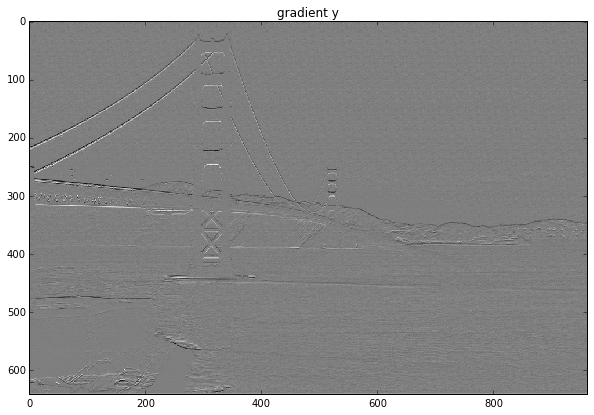

In [275]:
plt.gcf().set_size_inches(10, 8)
plt.title('gradient y')
plt.imshow(gy, cmap="gray")

## 4. Gradient magnitudes and orientations

In [276]:
grad_mag = np.sqrt(gx ** 2 + gy ** 2) # gradient magnitude
grad_ori = np.arctan2(gy, (gx + 1e-15)) * (180 / np.pi) + 90 # gradient orientation
print grad_ori.shape
print grad_mag.shape

(642, 962)
(642, 962)


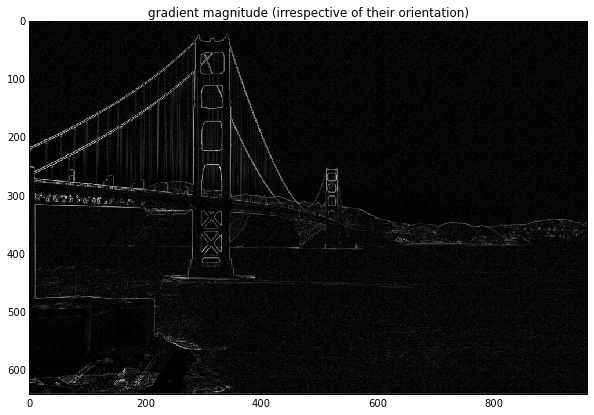

In [278]:
plt.gcf().set_size_inches(10, 8)
plt.title('gradient magnitude (irrespective of their orientation)')
plt.imshow(grad_mag, cmap="gray")

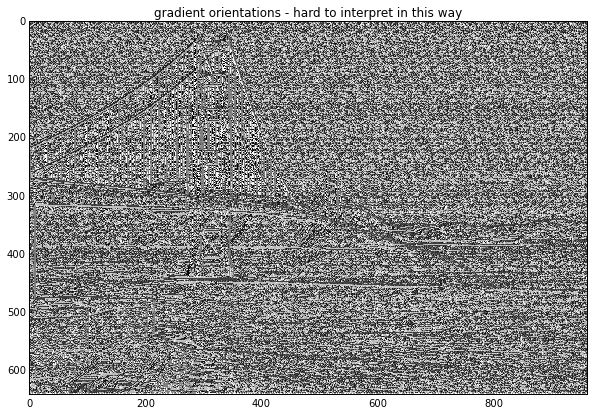

In [281]:
plt.gcf().set_size_inches(10, 8)
plt.title('gradient orientations - hard to interpret in this way')
plt.imshow(255.0 * (grad_ori - grad_ori.min())/(grad_ori.max() - grad_ori.min()), cmap="gray")

### A. Let's visualize gradients which are orientated from 0 to 20 degrees

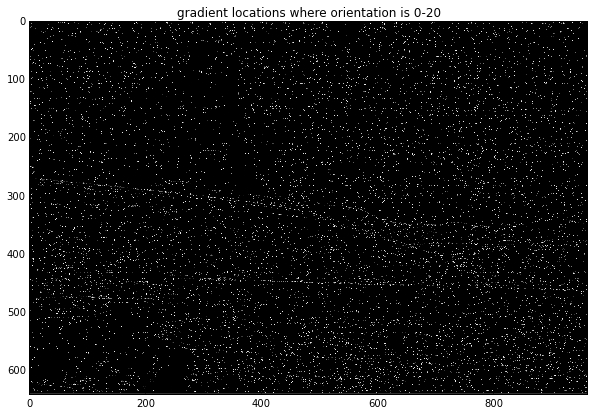

In [359]:
i = 0
temp_ori = np.where(grad_ori < 180 / orientations * (i + 1),
                        grad_ori, 0)

temp_ori = np.where(grad_ori >= 180 / orientations * i,
                        temp_ori, 0)

plt.gcf().set_size_inches(10, 8)
plt.title('gradient locations where orientation is 0-20')
plt.imshow(temp_ori, cmap="gray")

### Plot the gradient magnitude for these gradients

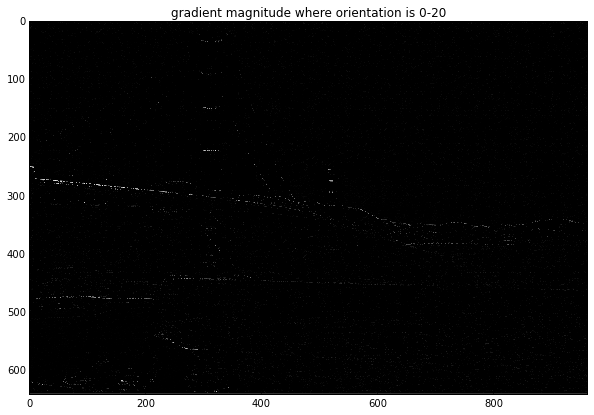

In [362]:
temp_mag = np.where(temp_ori > 0, grad_mag, 0)

plt.gcf().set_size_inches(10, 8)
plt.title('gradient magnitude where orientation is 0-20')
plt.imshow(temp_mag, cmap="gray")

The reason we see more horizontal lines is because all of the gradients that we filtered have orientation in the range of 0-20 degrees. 

### B. One interesting question to ask: Why is does the gradient magnitude plot look much cleaner compared to the orientations we plotted earlier?

Let's visualize what grayscale looks like:

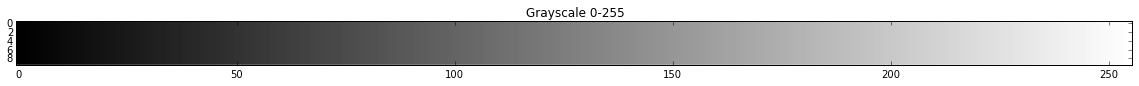

In [353]:
grayscale_stretchy = np.vstack([np.arange(256)]*10)
plt.gcf().set_size_inches(20, 20)
plt.title('Grayscale 0-255')
plt.imshow(grayscale_stretchy, cmap="gray")

Each column represents a single grayscale shade corresponding to pixel values 0-255.

Now, let's plot a single line from the gradient magnitude image to understand what's going on. 
Row 290 (which includes bridge girder) seems a good candidate for evaluation: 

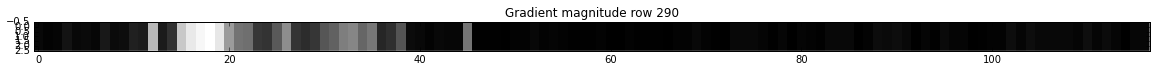

In [357]:
temp_mag_stretchy = np.vstack([temp_mag[290][temp_mag[290]> 0], temp_mag[290][temp_mag[290]> 0], temp_mag[290][temp_mag[290]> 0]])
plt.gcf().set_size_inches(20, 20)
plt.title('Gradient magnitude row 290')
plt.imshow(temp_mag_stretchy, cmap="gray")

Let's re-plot the same row of gradient orientations

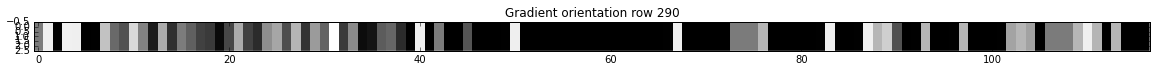

In [358]:
temp_ori_stretchy = np.vstack([temp_ori[290][temp_ori[290]> 0], temp_ori[290][temp_ori[290]> 0], temp_ori[290][temp_ori[290]> 0]])
plt.gcf().set_size_inches(20, 20)
plt.title('Gradient orientation row 290')
plt.imshow(temp_ori_stretchy, cmap="gray")

Now it's much more clear. We only see magitudes which are large enough to produce shades that can be identified by our eye. E.g, as it can be seen on the grayscale, we can hardly tell the difference among pixel values ranging from 0 to 25. That's explains why we see much cleaner magnitude image. 

### C. Let's visualize gradients which are orientated from 80 to 100 degrees
It's similar exercise as before. 

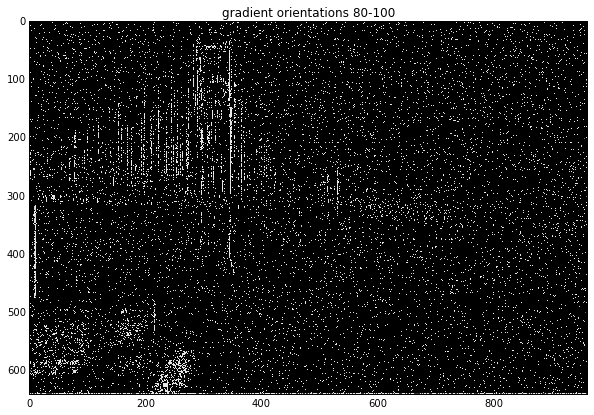

In [367]:
i = 4
temp_ori = np.where(grad_ori < 180 / orientations * (i + 1),
                        grad_ori, 0)

temp_ori = np.where(grad_ori >= 180 / orientations * i,
                        temp_ori, 0)

plt.gcf().set_size_inches(10, 8)
plt.title('gradient orientations 80-100')
plt.imshow(temp_ori, cmap="gray")

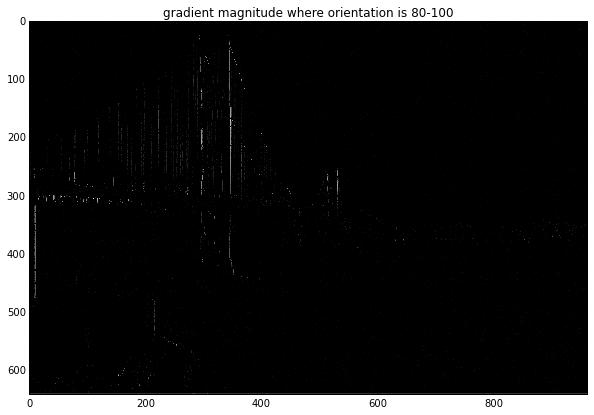

In [368]:
temp_mag = np.where(temp_ori > 0, grad_mag, 0)

plt.gcf().set_size_inches(10, 8)
plt.title('gradient magnitude where orientation is 80-100')
plt.imshow(temp_mag, cmap="gray")

Try to compare this result with gradient magnitude plot for orientation 0-20

### D. Side tutorial: visualizing effects of a uniform spatial filter

In [342]:
from scipy.ndimage import uniform_filter

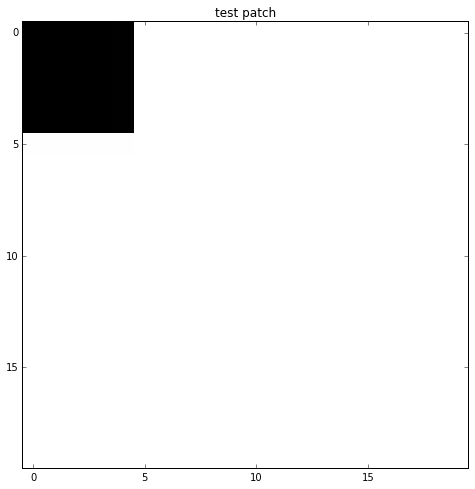

In [343]:
test=np.ones((20,20))*255

test[:5,:5] = 0
plt.title('test patch')

plt.gcf().set_size_inches(8, 8)
plt.rcParams['image.interpolation'] = 'none'
plt.imshow(test, cmap="gray")

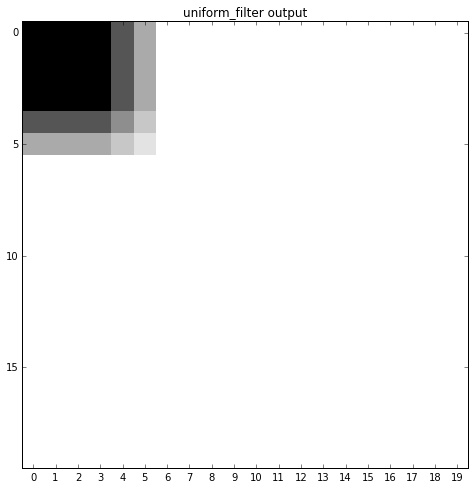

In [344]:
plt.title('uniform_filter output')
plt.gcf().set_size_inches(8, 8)
plt.xticks(range(20))
plt.rcParams['image.interpolation'] = 'none'
plt.imshow(uniform_filter(test, size=(3,3)), cmap="gray")

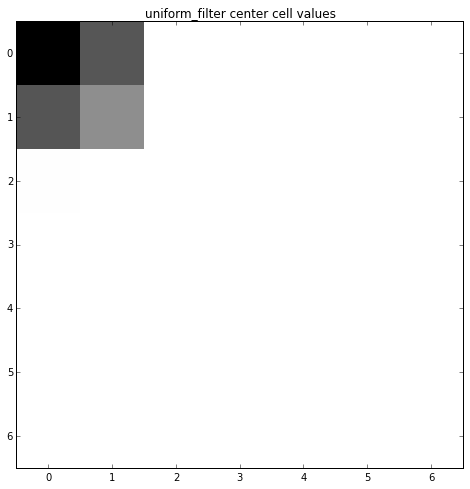

In [345]:
plt.title('uniform_filter center cell values')
plt.gcf().set_size_inches(8, 8)
#plt.xticks(range(10))
plt.imshow(uniform_filter(test, size=(3,3))[3/2::3, 3/2::3], cmap="gray")

## 5. Histogram of gradients (HoG)

In [370]:
# HoG parameters
sx, sy = image_gray.shape # image size
orientations = 9 # number of gradient bins
cx, cy = (8, 8) # pixels per cell
print "image shape=(%dx%d)"%(sx,sy)

image shape=(642x962)


In [371]:
# We take the small windows of size (n_cellsx, n_cellsy), 
# and measure kind(orientation) and magnitude of gradients present in that window
n_cellsx = int(np.floor(sx / cx))  # number of cells in x
n_cellsy = int(np.floor(sy / cy))  # number of cells in y
orientation_histogram = np.zeros((n_cellsx, n_cellsy, orientations))

### Histogram of 80-100 orientated gradients

In [372]:
orientation_histogram[:,:,8] = uniform_filter(temp_mag, size=(cx, cy))[cx/2::cx, cy/2::cy]

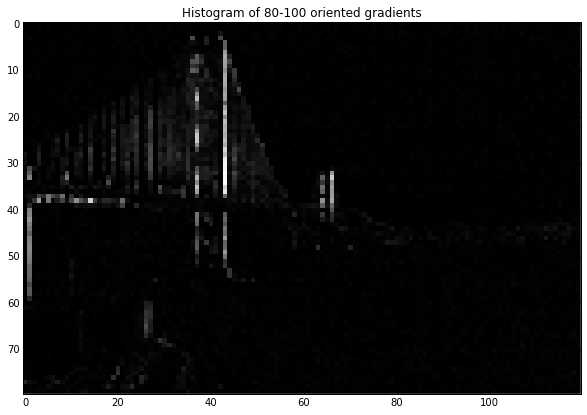

In [373]:
plt.gcf().set_size_inches(10, 8)
plt.title('Histogram of 80-100 oriented gradients')
plt.imshow(orientation_histogram[:,:,8], cmap="gray")

### Full HoG

In [244]:
for i in range(orientations):
    # create new integral image for this orientation
    # isolate orientations in this range
    temp_ori = np.where(grad_ori < 180 / orientations * (i + 1),
                        grad_ori, 0)
    temp_ori = np.where(grad_ori >= 180 / orientations * i,
                        temp_ori, 0)
    # select magnitudes for those orientations
    temp_mag = np.where(temp_ori, grad_mag, 0)
    orientation_histogram[:,:,i] = uniform_filter(temp_mag, size=(cx, cy))[cx/2::cx, cy/2::cy]

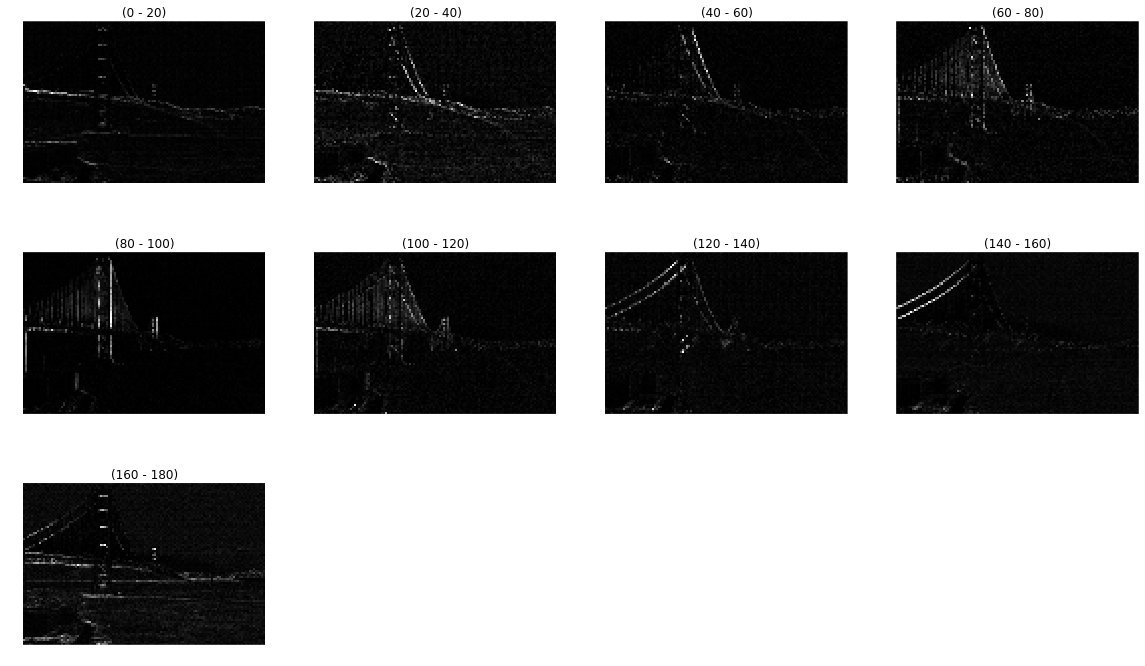

In [254]:
plt.gcf().set_size_inches(20, 20)
for i in range(orientations):
    plt.subplot(orientations/2+1, orientations/2, i+1)
    plt.title('(%d - %d)'%(i*20, (i+1)*20))
    
    plt.rcParams['image.interpolation'] = 'none'
    plt.imshow(orientation_histogram[:,:,i], cmap="gray")
    plt.gca().axis('off')

### HoG descriptor

In [257]:
hog_desc=orientation_histogram.ravel()

In [258]:
hog_desc.shape

(86400,)

# References

[1] [CS231n](http://cs231n.stanford.edu/)

[2] N. Dalal and B. Triggs. Histograms of oriented gradients for human detection. Coference on Computer Vision and Pattern Recognition (CVPR), 2005]

[3] Sample image https://www.flickr.com/photos/jimnix/4947712321 (noncommercial reuse only)
